## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leer dataset

In [2]:
dataset = pd.read_excel("datosProfesores.xlsx")
dataset.head()

,Unnamed: 0,Profesores,Puntuacion,Recomiendad,Dificultad,Etiqueta
0,NaN,OCOTITLA ROJAS NANCY,4.8,0.35,3.6,regular
1,NaN,CHAVARRIA BAEZ LORENA,6.0,0.45,5.3,malo
2,NaN,RODRIGUEZ SARABIA TANIA,5.2,0.42,1.8,bueno
3,NaN,ZAGAL FLORES ROBERTO ESWART,8.0,0.90,3.3,bueno
4,NaN,CATALAN SALGADO EDGAR ARMANDO,5.5,0.48,4.2,malo


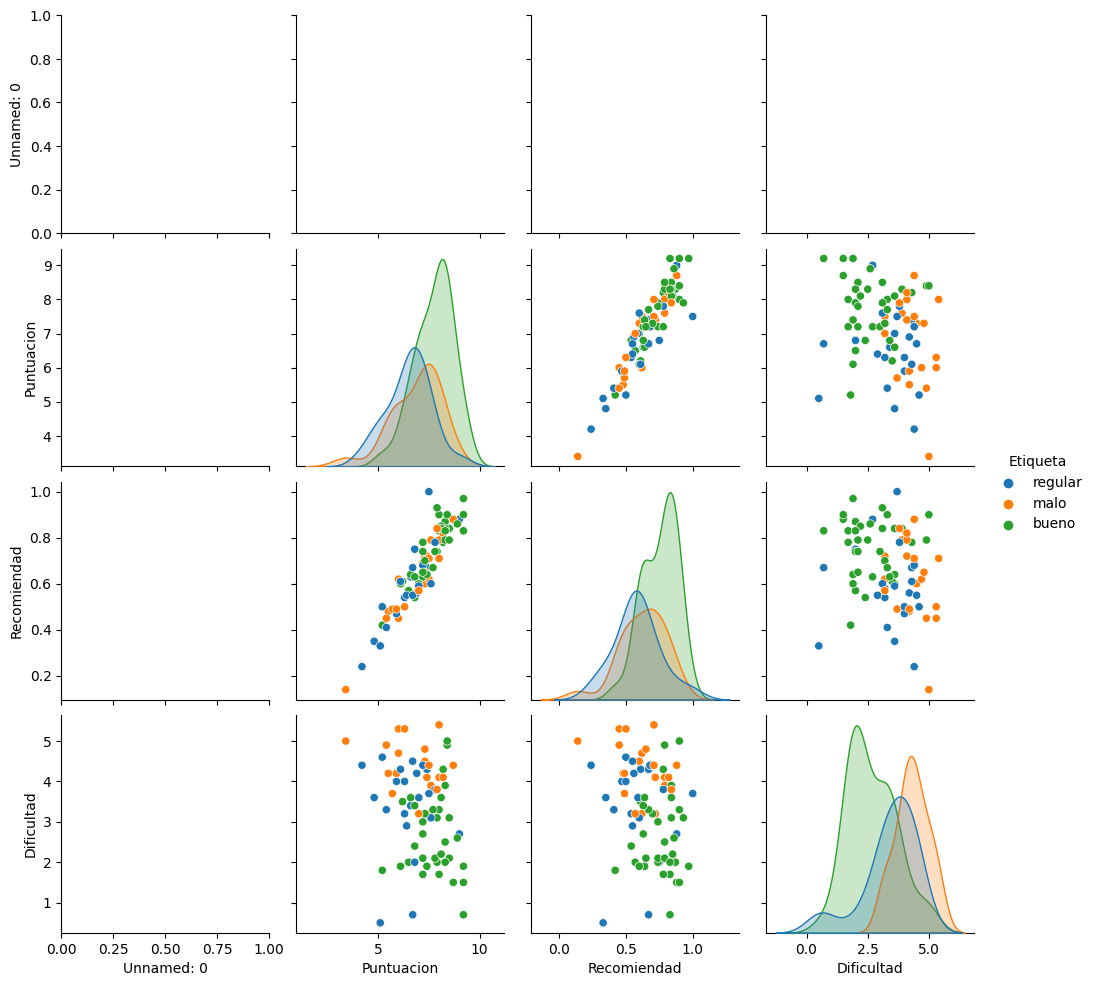

In [3]:
import seaborn as sns

sns.pairplot(dataset, hue='Etiqueta')

## Determinar rasgos

In [4]:
x = dataset.iloc[:, [2,4]].values

## Dendrogramas

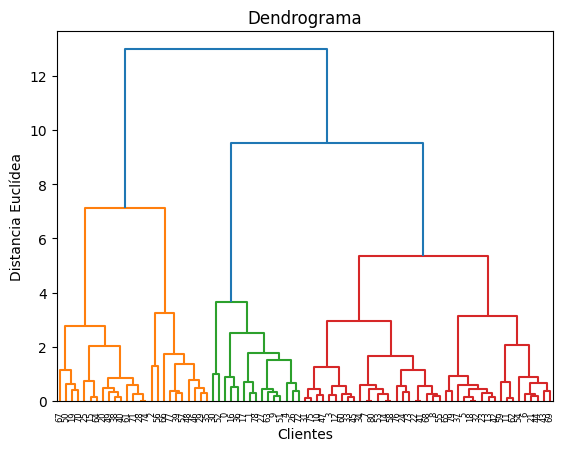

In [7]:
import scipy.cluster.hierarchy as sch

# Dendograma
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclídea')
plt.show()

# TODO: ¿Cuántos clusters se pueden identificar?

## Seguir con proceso de clustering

In [35]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([3, 3, 1, 4, 3, 0, 0, 4, 4, 3, 0, 0, 4, 0, 4, 2, 3, 3, 0, 2, 2, 0,
       4, 0, 4, 2, 3, 3, 2, 1, 3, 0, 0, 4, 4, 1, 3, 0, 2, 1, 2, 4, 0, 0,
       0, 4, 1, 4, 1, 2, 2, 3, 3, 4, 0, 4, 1, 1, 4, 0, 4, 2, 0, 3, 2, 0,
       1, 2, 4, 0, 2, 2, 3, 4, 2, 0, 4, 1, 3, 0, 4])

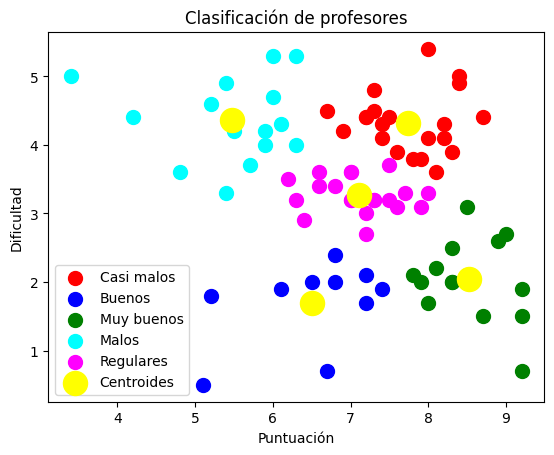

In [36]:
# Toma las coordenadas de los clientes y los agrupa en 5 grupos
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Casi malos')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Buenos')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Muy buenos')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Malos')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Regulares')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Clasificación de profesores')
plt.xlabel('Puntuación')
plt.ylabel('Dificultad')
plt.legend()
plt.show()

## Estadísticas

In [22]:
Cluster_0 = x[y_kmeans == 0]
Cluster_1 = x[y_kmeans == 1]
Cluster_2 = x[y_kmeans == 2]
Cluster_3 = x[y_kmeans == 3]
Cluster_4 = x[y_kmeans == 4]

print(f"Casi malos: \t{len(Cluster_0)}")
print(f"Buenos: \t{len(Cluster_1)}")
print(f"Muy buenos: \t{len(Cluster_2)}")
print(f"Malos: \t\t{len(Cluster_3)}")
print(f"Regulares: \t{len(Cluster_4)}")




Casi malos: 	21
Buenos: 	10
Muy buenos: 	15
Malos: 		15
Regulares: 	20


## Crear dataframe

In [18]:
lista_categorias = []
for i in y_kmeans:
    if i == 0:
        lista_categorias.append('Casi malo')
    elif i == 1:
        lista_categorias.append('Bueno')
    elif i == 2:
        lista_categorias.append('Muy bueno')
    elif i == 3:
        lista_categorias.append('Malo')
    elif i == 4:
        lista_categorias.append('Regulare')


In [20]:
# Crear dataframe
df = pd.DataFrame(data=x, columns=['Puntuación', 'Dificultad'])

# Añadir columna nueva
df['Categoria'] = lista_categorias

(81, 3)

## Exportar información

In [24]:
df.to_csv('informacionNueva.csv', index=False)